<hr>
Modified   By   Reason <br>
15-Jan-23  CBL  Original process WFAN data, hour long 1 sample of max signal strength per second off FFT <br>
16-Jan-23  CBL  Modified to save the butterworth filter coefficients. 
<hr>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from   scipy import signal
import pandas as pd
import scipy
from scipy.fft import fft, fftfreq

Text(0, 0.5, 'dBm')

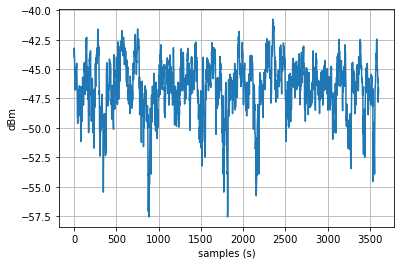

In [3]:
data = pd.read_csv('WFAN.txt')
plt.plot(data['Index'],data['dBm'])
plt.grid()
plt.xlabel('samples (s)')
plt.ylabel('dBm')

a:  [ 1.         -2.93717073  2.87629972 -0.93909894]  b:  [3.75683802e-06 1.12705141e-05 1.12705141e-05 3.75683802e-06]


Text(0, 0.5, 'dBm filtered')

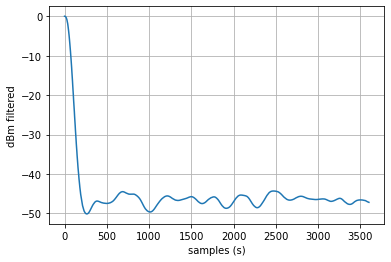

In [14]:
"""
filtfilt - 
b (N,) array_like
a (N,) array_like
x array_like, The array of data to be filtered.
"""
Order = 3
FractionalF = 0.01
b, a = scipy.signal.butter(Order, FractionalF)
"""
Add in function to save the data
22-Jan-23, modified to not save filter order or Fractional F
"""
#f = pd.DataFrame(data={'A':a,'B':b,'N':Order,'Fc':FractionalF})
df = pd.DataFrame(data={'A':a,'B':b})
df.to_csv('BW_coefs.csv')
print("a: ", a, " b: ", b)
Y = data['dBm']
#filtered = scipy.signal.filtfilt(b, a, Y)
filtered = scipy.signal.lfilter(b, a, Y)
plt.plot(data['Index'],filtered)
plt.grid()
plt.xlabel('samples (s)')
plt.ylabel('dBm filtered')

N:  2147


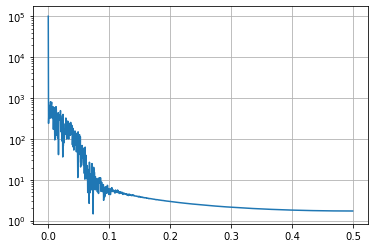

In [5]:
N = len(filtered)
print ("N: ", N)
T = 1.0
yf = fft(filtered)
xf = fftfreq(N, T)[:N//2]
y  = yf[0:N//2]
ymag = np.absolute(y)
plt.semilogy(xf, ymag)
plt.grid()

No real structure here. 